In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dtaidistance import dtw
import itertools
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import os

import random


# import GunPoint dataset from GunPoint/GunPoint_test.txt and GunPoint/GunPoint_train.txt


def load_dataset(file_path):
    with open(file_path) as f:
        lines = f.readlines()
    # Parse each line, separating the label and features
    labels = []
    features = []
    for line in lines:
        values = list(map(float, line.strip().split()))
        labels.append(int(values[0])-1)  # First value is the label, cast to int
        features.append(values[1:])    # Remaining values are features
    # Convert lists to numpy arrays for easier handling
    labels = np.array(labels)
    features = np.array(features)
    # normalize dataset to 0 1
    features = (features - features.min()) / (features.max() - features.min())
    return labels, features

# Load the GunPoint dataset

#dataset_path with join

train_path = os.path.join("GunPoint", "GunPoint_TRAIN.txt")
test_path = os.path.join("GunPoint", "GunPoint_TEST.txt")

train_labels, train_features = load_dataset(train_path)
INITIAL_TEST_LABELS, INITIAL_TEST_FEATURES = load_dataset(test_path)

# split test in validation (50) and test (100)



In [2]:

SEEDS = range(10)
EXP = "DTW"


In [3]:
import os
def save_results(EXP, encoding, seed, train_accuracy, val_accuracy, test_accuracy, Hamiltonian_c, hidden_alphas):
    # Create folder structure
    folder_name = f"{EXP}__{encoding}"
    seed_folder = os.path.join("exps_results", folder_name, f"exp_{seed}")
    os.makedirs(seed_folder, exist_ok=True)

    # Save configuration and OPT_TIMES to a text file
    with open(os.path.join(seed_folder, "config.txt"), "w") as f:
        f.write(f"Experiment: {EXP}\n")


    # Save train, validation, and test accuracy
    with open(os.path.join(seed_folder, "train_accuracy.txt"), "w") as f:
        f.write(f"Train Accuracy: {train_accuracy}\n")
    
    with open(os.path.join(seed_folder, "val_accuracy.txt"), "w") as f:
        f.write(f"Validation Accuracy: {val_accuracy}\n")

    with open(os.path.join(seed_folder, "test_accuracy.txt"), "w") as f:
        f.write(f"Test Accuracy: {test_accuracy}\n")

    # Save Hamiltonian_c and hidden_alphas
    with open(os.path.join(seed_folder, "Hamiltonian_c.txt"), "w") as f:
        f.write(str(Hamiltonian_c))

    with open(os.path.join(seed_folder, "hidden_alphas.txt"), "w") as f:
        f.write(str(hidden_alphas))


In [4]:
from SVM_models.ClassicalTemporalSVM import ClassicalTemporalSVM
from sklearn.metrics import accuracy_score

Building TRAIN_KERNEL:   0%|          | 0/1225 [00:00<?, ?it/s]

Building TRAIN_KERNEL: 100%|██████████| 1225/1225 [01:18<00:00, 15.66it/s]


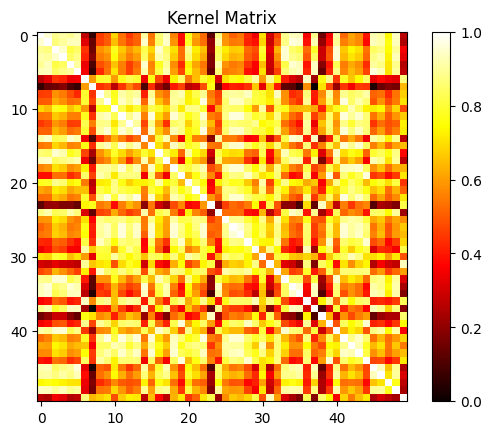

Train Accuracy: 0.76


Building TEST_KERNEL: 100%|██████████| 2500/2500 [02:31<00:00, 16.49it/s]


Validation Accuracy: 0.58


Building TEST_KERNEL: 100%|██████████| 5000/5000 [05:14<00:00, 15.90it/s]


Test Accuracy: 0.64
Saving model...


Building TRAIN_KERNEL: 100%|██████████| 1225/1225 [01:16<00:00, 16.04it/s]


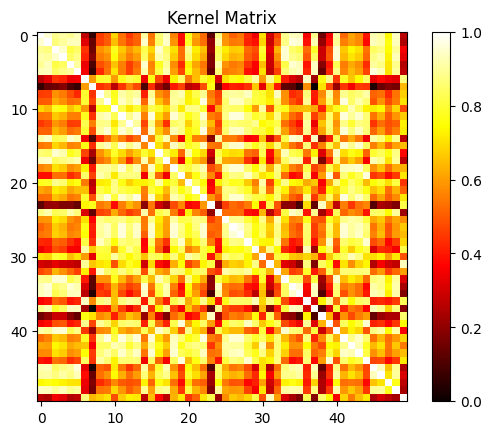

Train Accuracy: 0.76


Building TEST_KERNEL: 100%|██████████| 2500/2500 [02:34<00:00, 16.20it/s]


Validation Accuracy: 0.7


Building TEST_KERNEL:  92%|█████████▏| 4611/5000 [04:40<00:24, 15.59it/s]

In [ ]:
for SEED in SEEDS:

    random.seed(SEED)
    test_labels, val_labels, test_features, val_features = train_test_split(INITIAL_TEST_LABELS, INITIAL_TEST_FEATURES, test_size=0.33, random_state=SEED)
    
    quantum_svm = ClassicalTemporalSVM()

    quantum_svm.fit(train_features, train_labels)
    y_train = quantum_svm.predict_on_train()
    quantum_svm.print_as_heatmap(quantum_svm.K_train)

    train_accuracy = accuracy_score(train_labels, y_train)
    print(f"Train Accuracy: {train_accuracy}")

    y_val = quantum_svm.predict(val_features)
    val_accuracy = accuracy_score(val_labels, y_val)
    print(f"Validation Accuracy: {val_accuracy}")

    y_test = quantum_svm.predict(test_features)
    accuracy = accuracy_score(test_labels, y_test)
    print(f"Test Accuracy: {accuracy}")


    # now I want to save the model Hamiltonian_c and hidden_alphas
    print("Saving model...")


    save_results(EXP, None, SEED, train_accuracy, val_accuracy, accuracy, None, None)